In [0]:
# all the libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# for classification algorithm testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

In [0]:
#####################################################
# Author: Zachary Delardi and Maggie Sweeney        #
# Date: 5/5/20                                      #
#####################################################

In [45]:
#Upload the original dataset
data = pd.read_csv("/content/Fraud_Data/creditcard.csv", engine='python')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
#Show the amount column details
data.loc[:, ['Amount']].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [47]:
#Normalizing the data
#Need to scale Time and Amount to normalize it (all other columns are scaled already due to PCA)
rob_scaler = RobustScaler()

data['Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

scaled_amount = data['Amount']
scaled_time = data['Time']

data.drop(['Amount', 'Time'], axis=1, inplace=True)
data.insert(0, 'Amount', scaled_amount)
data.insert(1, 'Time', scaled_time)

data.head()

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [48]:
#Describing contents of the data after it has been scaled
data.describe()

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [49]:
#Shows the classification distribution between fraud (1) and not fraud (0)
print("0 = not fraud")
print("1 = fraud")
print((data.Class.value_counts(normalize = True) * 100))

0 = not fraud
1 = fraud
0    99.827251
1     0.172749
Name: Class, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

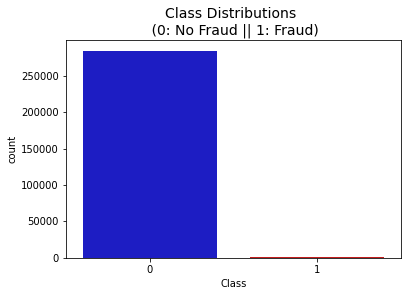

In [50]:
#Chart of classification distribution
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data = data, palette = colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Correlation')

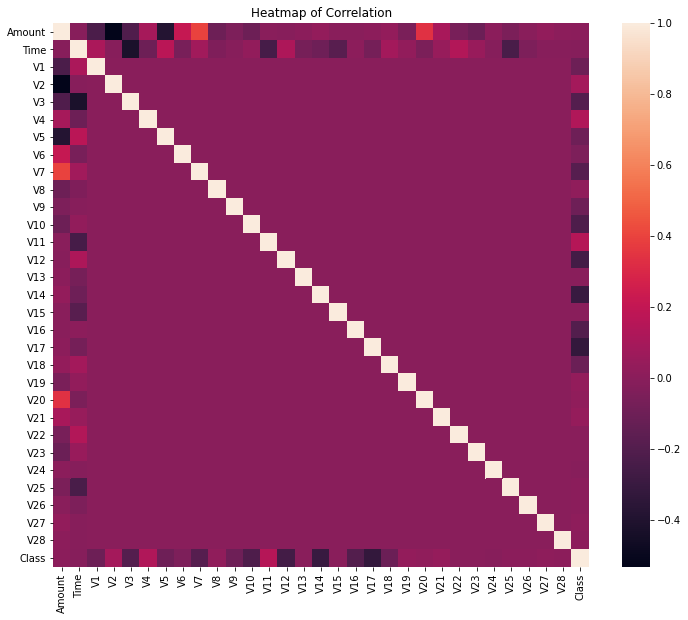

In [51]:
#Heatmap of column correlations
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [52]:
#Splitting into 5 testing and training sets
#Need to split the data before we undersample so we test on the original dataset
X = data.drop('Class', axis=1)
y = data['Class']

splt = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#Splits the data into 5 training & testing sets
#You should test on multiple splits of data 
for train_index, test_index in splt.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [53]:
#Now we randomly undersample the data to get even distribution of 'fraud' and 'not fraud'
data = data.sample(frac = 1)

#Set the amount of nonfraud transactions to equal the amount of fraud transactions
fraud_data = data.loc[data['Class'] == 1]
nonfraud_data = data.loc[data['Class'] == 0][:492]

distributed_data = pd.concat([fraud_data, nonfraud_data])

#Shuffle the new dataset
new_data = distributed_data.sample(frac=1, random_state=42)

#Shows the evenly distributed data with selected columns
new_data[['Amount', 'Time', 'Class']]

,Amount,Time,Class
220386,-0.202473,0.674973,0
11841,-0.293440,-0.756118,1
266349,-0.293440,0.911712,0
8296,-0.293440,-0.864813,1
157868,-0.296793,0.303751,1
...,...,...,...
189701,0.996996,0.514891,1
116404,4.042199,-0.122534,1
40724,-0.307413,-0.520695,0
15476,1.089779,-0.679390,1


0 = not fraud
1 = fraud
1    50.0
0    50.0
Name: Class, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

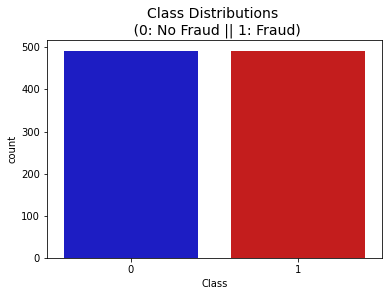

In [54]:
#Shows the new distribution
print("0 = not fraud")
print("1 = fraud")
print((new_data.Class.value_counts(normalize = True) * 100))

#Shows the new chart
sns.countplot('Class', data = new_data, palette = colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Text(0.5, 1.0, 'Heatmap of Correlation')

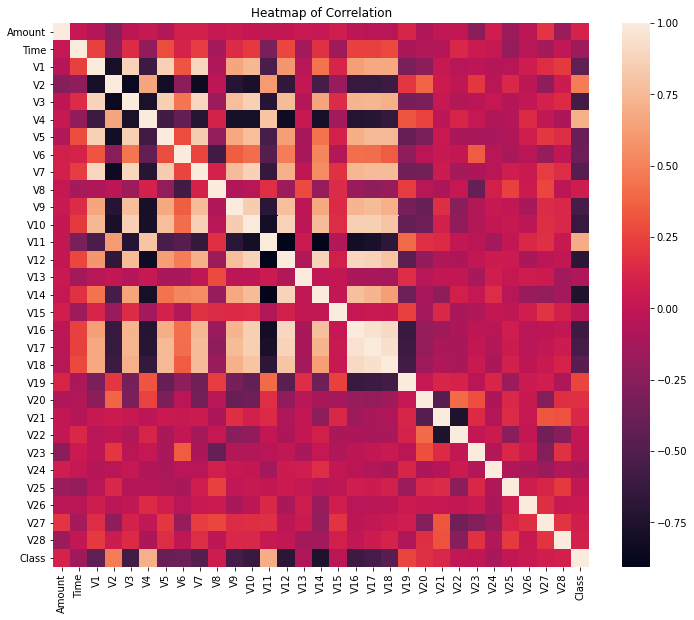

In [55]:
#Heatmap of balanced and normalized data
new_corr = new_data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(new_corr)
plt.title('Heatmap of Correlation')

In [56]:
#Show high positive correlations
corr[new_corr.Class > 0.5]

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V4,0.098732,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.133447
V11,0.000104,-0.247689,2.438580e-16,9.468995e-16,-5.501758e-17,-2.083600e-16,7.342759e-16,4.865799e-16,-1.084105e-15,1.954747e-16,4.682341e-16,2.624448e-16,1.000000e+00,3.176029e-15,1.945810e-15,3.637160e-17,4.801345e-16,-6.173867e-16,8.719713e-16,5.978229e-16,3.216338e-16,-2.310189e-16,-3.911893e-16,-3.811640e-17,2.232007e-16,1.219849e-15,-4.567635e-16,-1.110976e-16,-2.635827e-16,-3.091914e-16,0.154876
Class,0.005632,-0.012323,-1.013473e-01,9.128865e-02,-1.929608e-01,1.334475e-01,-9.497430e-02,-4.364316e-02,-1.872566e-01,1.987512e-02,-9.773269e-02,-2.168829e-01,1.548756e-01,-2.605929e-01,-4.569779e-03,-3.025437e-01,-4.223402e-03,-1.965389e-01,-3.264811e-01,-1.114853e-01,3.478301e-02,2.009032e-02,4.041338e-02,8.053175e-04,-2.685156e-03,-7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03,1.000000


In [57]:
#Show high negative correlations
corr[new_corr.Class < -0.5]

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V3,-0.210880,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.192961
V9,-0.044246,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-16,-1.588105e-15,-3.251906e-16,6.535992e-16,1.203843e-16,1.120752e-16,-4.340941e-16,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.097733
V10,-0.101502,0.030617,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,2.624448e-16,1.439907e-15,-8.853582e-16,2.622513e-16,7.615272e-16,-1.705923e-15,3.674182e-15,3.986710e-16,2.663038e-17,-1.141888e-15,8.089504e-16,-6.707598e-16,3.809732e-16,-4.032806e-17,-2.863813e-16,-2.554293e-16,-3.103239e-16,-1.515934e-16,-0.216883
V12,-0.009542,0.124348,2.422086e-16,-6.588252e-16,2.206522e-16,-5.657963e-16,3.761033e-16,2.140589e-16,1.510045e-15,-6.266057e-17,-2.445230e-15,1.439907e-15,3.176029e-15,1.000000e+00,-2.306149e-14,1.761652e-16,8.858186e-16,3.530418e-16,-9.869814e-16,-5.881814e-16,9.282566e-17,1.276976e-16,3.229576e-16,-5.903992e-16,1.392162e-16,4.901644e-16,5.053736e-16,-5.759321e-16,-2.312619e-16,7.327446e-16,-0.260593
V14,0.033751,-0.098757,9.352582e-16,-2.541036e-16,4.271336e-16,-8.522435e-17,-3.634803e-16,3.452801e-16,-1.729462e-16,-1.131098e-16,2.343317e-16,2.622513e-16,3.637160e-17,1.761652e-16,2.841428e-15,1.000000e+00,4.165738e-17,7.910367e-17,4.626140e-15,8.980955e-17,-1.061486e-16,-1.789433e-16,1.634141e-17,3.439699e-16,7.620728e-17,2.335749e-16,-2.606783e-16,-6.580254e-18,1.285770e-16,2.503271e-15,-0.302544
V16,-0.003910,0.011903,6.308789e-16,4.934097e-17,1.183364e-15,-6.939204e-16,-3.517076e-16,-2.477917e-16,2.893672e-16,5.027192e-16,-3.251906e-16,-1.705923e-15,-6.173867e-16,3.530418e-16,3.361767e-16,7.910367e-17,1.335904e-15,1.000000e+00,1.854297e-15,-3.015119e-15,1.041659e-15,3.903456e-16,-3.927401e-16,3.878384e-17,8.519670e-16,-4.289239e-16,-6.644104e-16,-5.186503e-16,7.820038e-16,8.637186e-16,-0.196539
V17,0.007309,-0.073297,-5.011524e-16,-9.883008e-16,4.576619e-17,-4.397925e-16,1.425729e-16,3.567582e-16,1.149692e-15,-3.508777e-16,6.535992e-16,3.674182e-15,8.719713e-16,-9.869814e-16,-3.187905e-16,4.626140e-15,3.208310e-16,1.854297e-15,1.000000e+00,-5.584714e-15,-3.916791e-16,-9.887431e-16,-7.753967e-16,-8.389703e-16,5.367784e-16,-5.543631e-17,4.822068e-16,4.870302e-16,8.844373e-16,-2.182692e-16,-0.326481


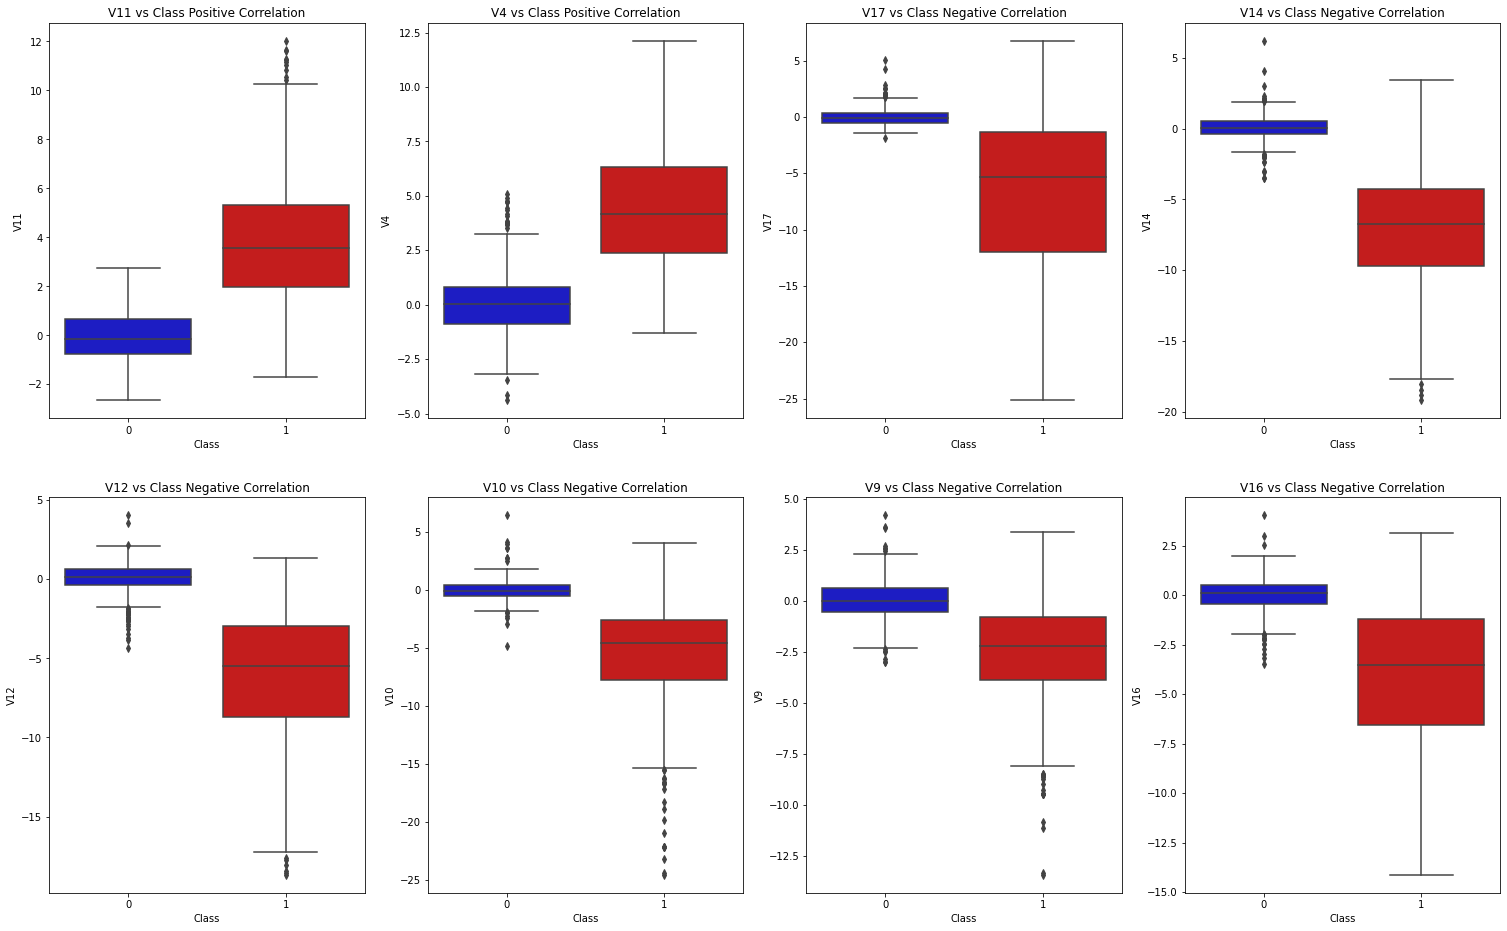

In [58]:
#Boxplots of positive and negative correlations
#Helps to show extreme outliers
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

#V11
sns.boxplot(x="Class", y="V11", data=new_data, palette=colors, ax=axes[0,0])
axes[0,0].set_title('V11 vs Class Positive Correlation')

#V4
sns.boxplot(x="Class", y="V4", data=new_data, palette=colors, ax=axes[0,1])
axes[0,1].set_title('V4 vs Class Positive Correlation')

#V17
sns.boxplot(x="Class", y="V17", data=new_data, palette=colors, ax=axes[0,2])
axes[0,2].set_title('V17 vs Class Negative Correlation')

#V14
sns.boxplot(x="Class", y="V14", data=new_data, palette=colors, ax=axes[0,3])
axes[0,3].set_title('V14 vs Class Negative Correlation')

#V12
sns.boxplot(x="Class", y="V12", data=new_data, palette=colors, ax=axes[1,0])
axes[1,0].set_title('V12 vs Class Negative Correlation')

#V10
sns.boxplot(x="Class", y="V10", data=new_data, palette=colors, ax=axes[1,1])
axes[1,1].set_title('V10 vs Class Negative Correlation')

#V9
sns.boxplot(x="Class", y="V9", data=new_data, palette=colors, ax=axes[1,2])
axes[1,2].set_title('V9 vs Class Negative Correlation')

#V16
sns.boxplot(x="Class", y="V16", data=new_data, palette=colors, ax=axes[1,3])
axes[1,3].set_title('V16 vs Class Negative Correlation')

plt.show()


In [59]:
#Removing extreme outliers using the Interquartile method
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)

#Finding the interquartile range (difference between upper quartile (highest 25%) & lower quartile (lowest 25%))
IQR = Q3 - Q1

#Setting the new testing data to the IQR equation that sets the min and max fence
fresh_data = new_data[~((new_data < (Q1 - 2.5 * IQR)) |(new_data > (Q3 + 2.5 * IQR))).any(axis=1)]

#Prints how many outliers were deleted
len_after = len(fresh_data)
len_before = len(new_data)
len_difference = len(new_data) - len(fresh_data)
print('data size was reduced from {} transactions to {} transactions.'.format(len_before, len_after))

data size was reduced from 984 transactions to 701 transactions.


In [0]:
#Reducing dimensionality using t-SNE to compact column amount
#T-SNE calculates similarity measurements between pairs of instances in high dimensional state
#It optimizes the dimensions using a cost function
X = fresh_data.drop('Class', axis=1)
y = fresh_data['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [0]:
#Split training and testing data for cross validation
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values


In [62]:
#Run cross validation on different models
models = []

models.append(('Logisitc Regression', LogisticRegression()))
models.append(('Linear Regression', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Random Forest', RandomForestClassifier()))

results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=42)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(msg)

Logisitc Regression: 0.968780 (0.019208)
Linear Regression: 0.967387 (0.024017)
KNN: 0.964870 (0.024375)
Decision Tree: 0.895002 (0.039901)
Support Vector Machine: 0.971993 (0.023075)
Random Forest: 0.966515 (0.033213)


In [63]:
#Logistic Regression - training the data
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Logistic regreaaion - testing the data
pred = logistic_regression.predict(X_test)

In [65]:
#Testing the accuracy
train_accuracy_percentage = metrics.accuracy_score(y_train,logistic_regression.predict(X_train))
train_accuracy_percentage = train_accuracy_percentage * 100

print('The train set accuracy is {} %'.format(train_accuracy_percentage))

accuracy = metrics.accuracy_score(y_test, pred)
test_accuracy_percentage = 100 * accuracy
print('The test set accuracy is {} %'.format(test_accuracy_percentage))

The train set accuracy is 95.35714285714286 %
The test set accuracy is 93.61702127659575 %


In [66]:
#Printing scores of logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        91
           1       0.96      0.86      0.91        50

    accuracy                           0.94       141
   macro avg       0.94      0.92      0.93       141
weighted avg       0.94      0.94      0.94       141



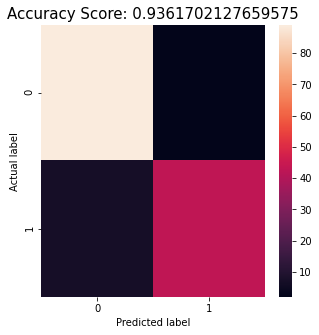

In [67]:
#Confusion matrix for logistic regression
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [68]:
#Now we can do binary tree
t0 = time.time()

#Create Decision Tree classifer object
dt = DecisionTreeClassifier()

#Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

t1 = time.time()
print("Total Time: " + str(t1-t0))

#Predict the response for test dataset
y_pred = dt.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Total Time: 0.01185464859008789
Accuracy: 0.8794326241134752


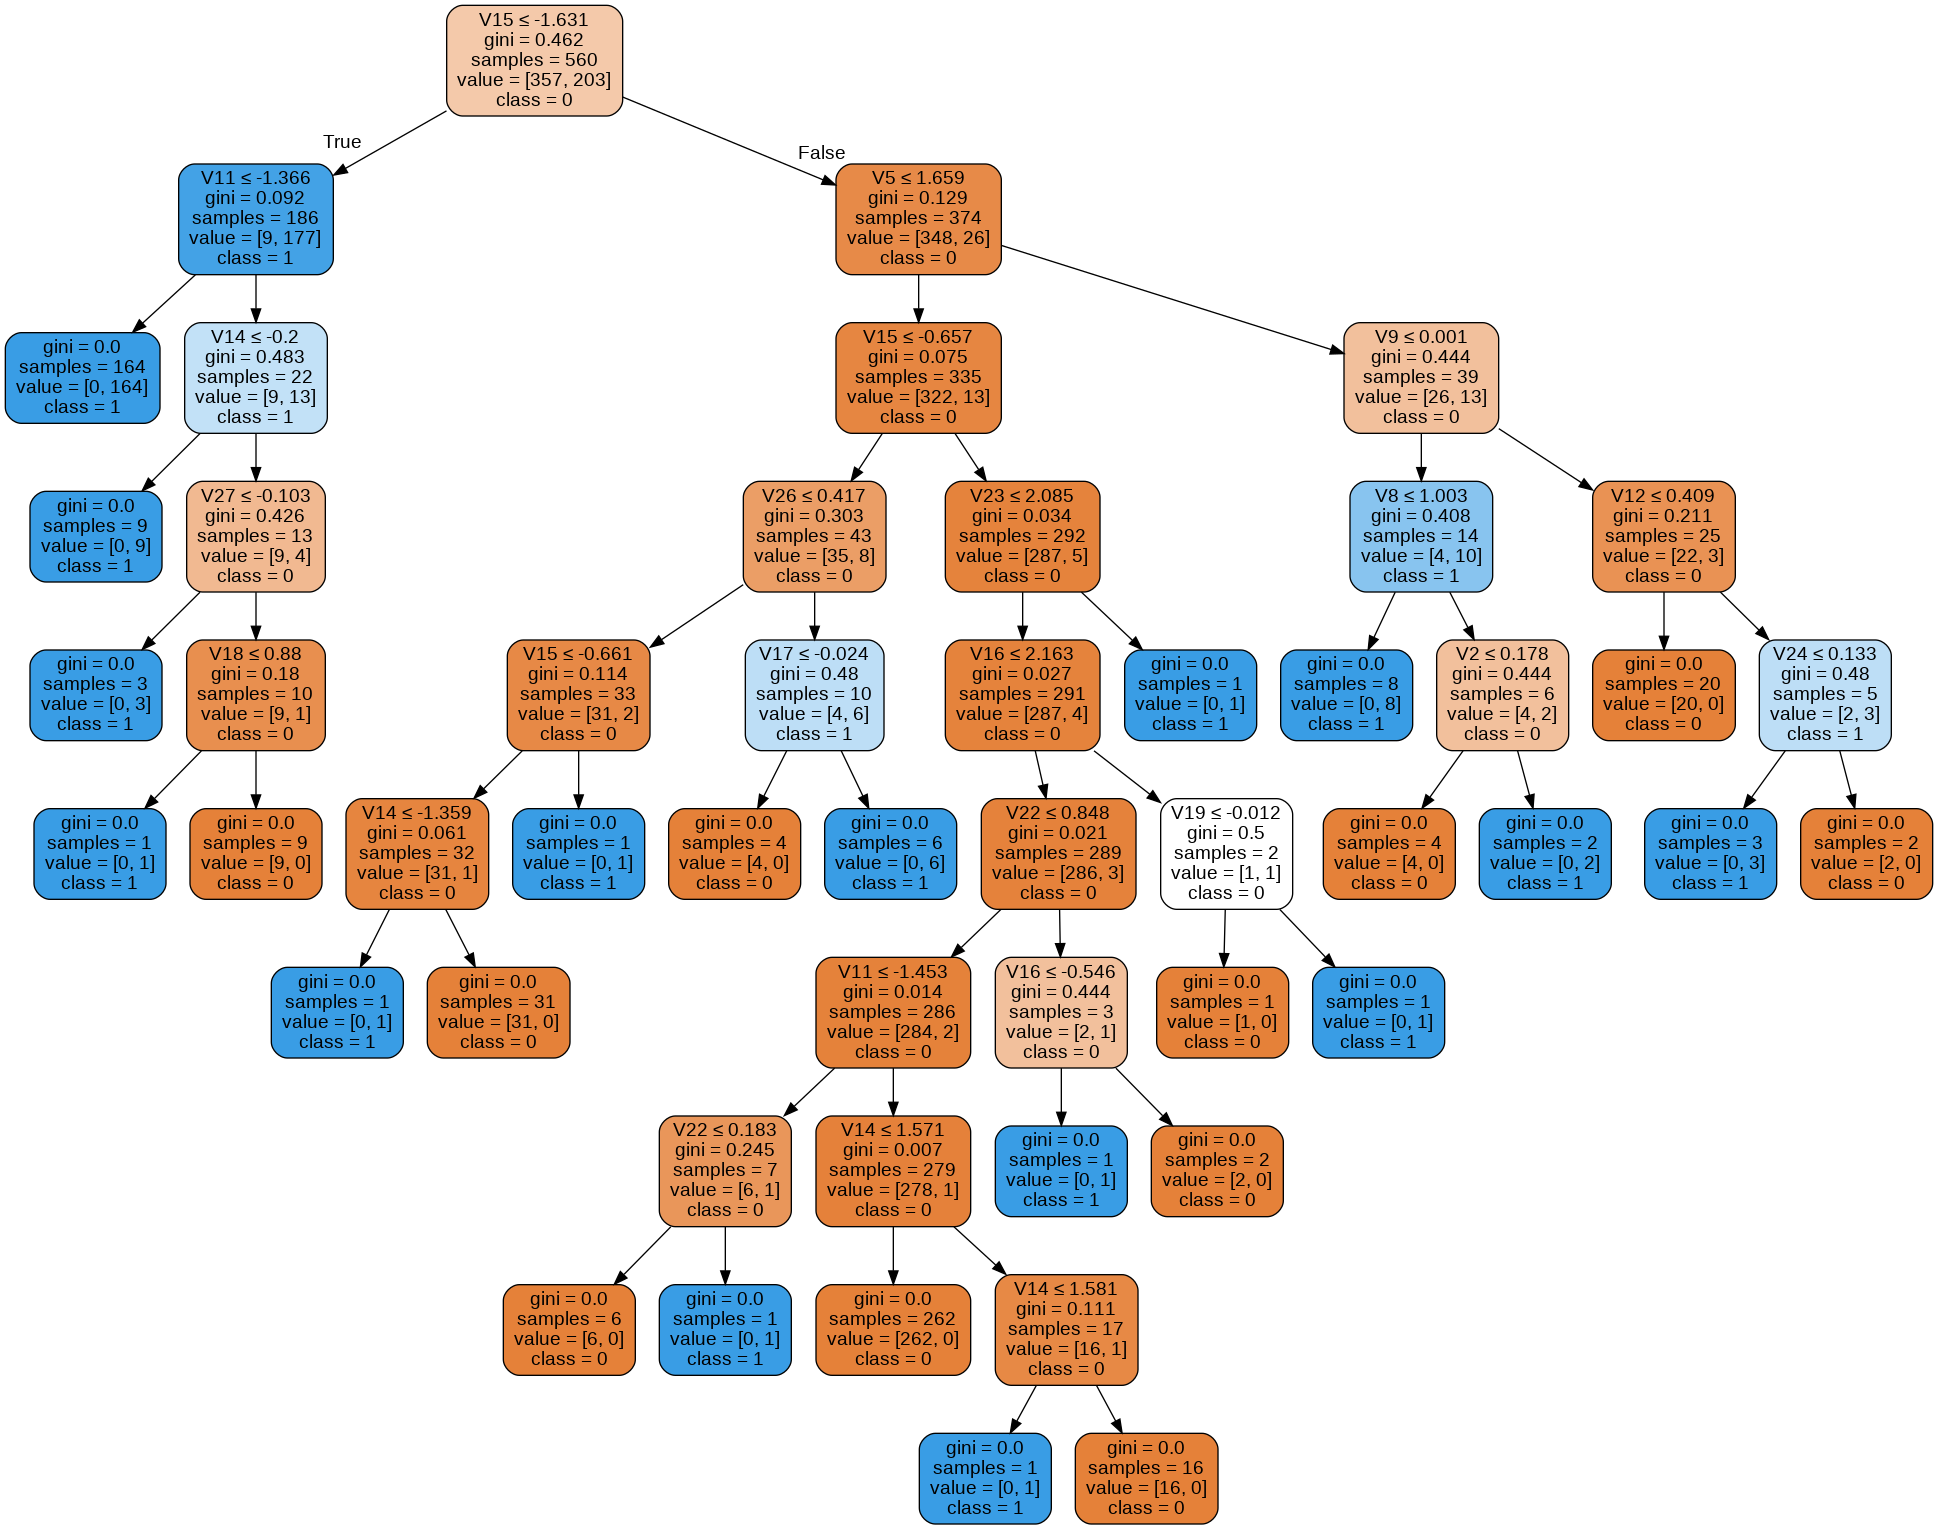

In [69]:
#Try to output image of our decision tree
#Libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#Header labels
header = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Class"]

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = header, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/content/Fraud_Data/fraud.png')
Image(graph.create_png())

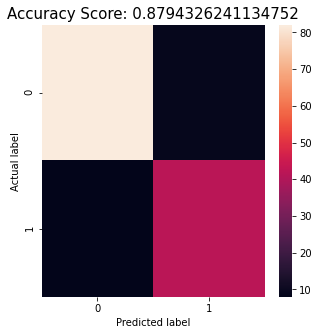

In [70]:
#confusion matrix for decision tree
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);